In [83]:

%matplotlib inline
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score




from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pylab as plt



In [70]:
# Correlation Table
air_df = pd.read_csv('D:/Course/big data II/project/model.csv')
air_df.corr().round(2)

days_before_qua  exsisting_confirmed_on_qua  \
days_before_qua                        1.00                        0.42   
exsisting_confirmed_on_qua             0.42                        1.00   
existing_confirmed_TP                  0.26                        0.94   
accumulated_confirmed_TP               0.27                        0.94   
accumulated_death_TP                   0.26                        0.93   
accumulated_recovered_TP               0.27                        0.94   
total_pop                              0.58                        0.26   
area                                  -0.26                       -0.19   
pop_density                            0.31                       -0.04   
avg_age                                0.43                        0.16   
0-14                                   0.41                        0.25   
15-64                                  0.59                        0.26   
65-                                    0.65                        0.24   
total_passenger_volume                 0.13                        0.34   
area_passenger_volume                  0.37                       -0.03   
actual_passenger_volume                0.22                        0.93   
air_passenger_volume                   0.23                        0.18   
railway_passenger_volume               0.25                        0.26   
bus_passenger_volume                  -0.00                        0.35   
hospitals                             -0.27                        0.13   
hospital_beds                         -0.16                        0.26   
quarantine_level                       0.11                       -0.16   

                            existing_confirmed_TP  accumulated_confirmed_TP  \
days_before_qua                              0.26                      0.27   
exsisting_confirmed_on_qua                   0.94                      0.94   
existing_confirmed_TP                        1.00                      1.00   
accumulated_confirmed_TP                     1.00                      1.00   
accumulated_death_TP                         1.00                      1.00   
accumulated_recovered_TP                     1.00                      1.00   
total_pop                                    0.05                      0.05   
area                                        -0.06                     -0.06   
pop_density                                 -0.04                     -0.04   
avg_age                                      0.06                      0.06   
0-14                                         0.05                      0.05   
15-64                                        0.05                      0.05   
65-                                          0.04                      0.04   
total_passenger_volume                       0.13                      0.12   
area_passenger_volume                       -0.05                     -0.05   
actual_passenger_volume                      0.95                      0.95   
air_passenger_volume                        -0.04                     -0.04   
railway_passenger_volume                     0.06                      0.06   
bus_passenger_volume                         0.17                      0.17   
hospitals                                    0.10                      0.10   
hospital_beds                                0.13                      0.13   
quarantine_level                            -0.13                     -0.13   

                            accumulated_death_TP  accumulated_recovered_TP  \
days_before_qua                             0.26                      0.27   
exsisting_confirmed_on_qua                  0.93                      0.94   
existing_confirmed_TP                       1.00                      1.00   
accumulated_confirmed_TP                    1.00                      1.00   
accumulated_death_TP                        1.00                      1.00   
accumulated_reco

In [71]:

predictors = ['exsisting_confirmed_on_qua','days_before_qua','total_pop','15-64','65-','pop_density','avg_age','actual_passenger_volume','hospitals','hospital_beds']
outcome = 'accumulated_confirmed_TP'

# partition data
X = pd.get_dummies(air_df[predictors], drop_first=True)
y = air_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.03, random_state=1)

car_lm = LinearRegression()
car_lm.fit(train_X, train_y)

# print coefficients
print('intercept ', car_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': car_lm.coef_}))

# print performance measures
regressionSummary(train_y, car_lm.predict(train_X))

intercept  15942.810044860731
                    Predictor  coefficient
0  exsisting_confirmed_on_qua    60.479165
1             days_before_qua  -180.312299
2                   total_pop     0.004250
3                       15-64    -0.006729
4                         65-     0.007257
5                 pop_density     0.118142
6                     avg_age  -422.293977
7     actual_passenger_volume     0.000969
8                   hospitals     6.165533
9               hospital_beds    -0.033565

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 1483.7351
            Mean Absolute Error (MAE) : 1225.6377
          Mean Percentage Error (MPE) : -3975.3817
Mean Absolute Percentage Error (MAPE) : 5033.0243


In [72]:
pred_y = car_lm.predict(train_X)

print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, car_lm))
print('AIC : ', AIC_score(train_y, pred_y, car_lm))
print('BIC : ', BIC_score(train_y, pred_y, car_lm))

adjusted r2 :  0.9714564789990361
AIC :  582.1604122559506
BIC :  599.7492430895473


In [73]:
# Use predict() to make predictions on a new set
car_lm_pred = car_lm.predict(valid_X)

result = pd.DataFrame({'Predicted': car_lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - car_lm_pred})
print(result.head(20))

# Compute common accuracy measures
regressionSummary(valid_y, car_lm_pred)

      Predicted  Actual     Residual
14  2444.336567     497 -1947.336567
19   732.408890     235  -497.408890

Regression statistics

                      Mean Error (ME) : -1222.3727
       Root Mean Squared Error (RMSE) : 1421.1853
            Mean Absolute Error (MAE) : 1222.3727
          Mean Percentage Error (MPE) : -301.7408
Mean Absolute Percentage Error (MAPE) : 301.7408


0.5


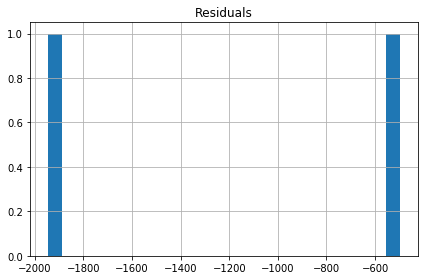

In [74]:
car_lm_pred = car_lm.predict(valid_X)
all_residuals = valid_y - car_lm_pred

# Determine the percentage of datapoints with a residual in [-1406, 1406] = approx. 75\%
print(len(all_residuals[(all_residuals > -1406) & (all_residuals < 1406)]) / len(all_residuals))

ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)

plt.tight_layout()
plt.show()

In [75]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    pred_y = model.predict(train_X[variables])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model)

allVariables = train_X.columns
results = exhaustive_search(allVariables, train_model, score_model)

data = []
for result in results:
    model = result['model']
    variables = result['variables']
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)
    
    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)
pd.set_option('display.width', 100)
print(pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables))))
pd.reset_option('display.width')


    n     r2adj         AIC  15-64    65-  actual_passenger_volume  avg_age  days_before_qua  \
0   1  0.908637  612.803069  False  False                     True    False            False   
1   2  0.939139  600.718490  False  False                     True    False            False   
2   3  0.953263  593.145329  False  False                     True    False            False   
3   4  0.958444  590.222439   True  False                     True    False            False   
4   5  0.965506  585.053744   True  False                     True    False            False   
5   6  0.970206  581.111833   True  False                     True    False             True   
6   7  0.971662  580.201960   True  False                     True    False             True   
7   8  0.971478  581.046865   True   True                     True    False             True   
8   9  0.970945  582.217542   True   True                     True    False             True   
9  10  0.971456  582.160412   True   Tru

In [76]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: exsisting_confirmed_on_qua, days_before_qua, total_pop, 15-64, 65-, pop_density, avg_age, actual_passenger_volume, hospitals, hospital_beds
Start: score=582.16
Step: score=582.16, remove None
['exsisting_confirmed_on_qua', 'days_before_qua', 'total_pop', '15-64', '65-', 'pop_density', 'avg_age', 'actual_passenger_volume', 'hospitals', 'hospital_beds']


In [10]:
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))


Regression statistics

                      Mean Error (ME) : 281.9288
       Root Mean Squared Error (RMSE) : 1095.0689
            Mean Absolute Error (MAE) : 1058.1550
          Mean Percentage Error (MPE) : -30.3372
Mean Absolute Percentage Error (MAPE) : 299.9718


In [77]:
# The initial model is the constant model - this requires special handling
# in train_model and score_model
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = forward_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: exsisting_confirmed_on_qua, days_before_qua, total_pop, 15-64, 65-, pop_density, avg_age, actual_passenger_volume, hospitals, hospital_beds
Start: score=688.43, constant
Step: score=612.80, add actual_passenger_volume
Step: score=600.72, add hospital_beds
Step: score=593.15, add exsisting_confirmed_on_qua
Step: score=590.89, add avg_age
Step: score=590.89, add None
['actual_passenger_volume', 'hospital_beds', 'exsisting_confirmed_on_qua', 'avg_age']


In [67]:
best_model, best_variables = stepwise_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

ValueError: Found array with 0 feature(s) (shape=(32, 0)) while a minimum of 1 is required.

In [54]:
lasso = Lasso(normalize=True, alpha=1)
lasso.fit(train_X, train_y)
regressionSummary(valid_y, lasso.predict(valid_X))

lasso_cv = LassoCV(normalize=True, cv=5)
lasso_cv.fit(train_X, train_y)
regressionSummary(valid_y, lasso_cv.predict(valid_X))
print('Lasso-CV chosen regularization: ', lasso_cv.alpha_)
print(lasso_cv.coef_)

ridge = Ridge(normalize=True, alpha=1)
ridge.fit(train_X, train_y)
regressionSummary(valid_y, ridge.predict(valid_X))

bayesianRidge = BayesianRidge(normalize=True)
bayesianRidge.fit(train_X, train_y)
regressionSummary(valid_y, bayesianRidge.predict(valid_X))
print('Bayesian ridge chosen regularization: ', bayesianRidge.lambda_ / bayesianRidge.alpha_)


Regression statistics

                      Mean Error (ME) : -433.8211
       Root Mean Squared Error (RMSE) : 819.1615
            Mean Absolute Error (MAE) : 694.8560
          Mean Percentage Error (MPE) : -58.0097
Mean Absolute Percentage Error (MAPE) : 169.0883

Regression statistics

                      Mean Error (ME) : -1497.1825
       Root Mean Squared Error (RMSE) : 1526.3823
            Mean Absolute Error (MAE) : 1497.1825
          Mean Percentage Error (MPE) : -435.8444
Mean Absolute Percentage Error (MAPE) : 435.8444
Lasso-CV chosen regularization:  1460.7912740357556
[ 0.          0.          0.          0.          0.         -0.
  0.          0.00026476  0.          0.        ]

Regression statistics

                      Mean Error (ME) : -99.1141
       Root Mean Squared Error (RMSE) : 125.1265
            Mean Absolute Error (MAE) : 99.1141
          Mean Percentage Error (MPE) : -22.4930
Mean Absolute Percentage Error (MAPE) : 22.4930

Regression statistics

In [55]:
linearRegression = LinearRegression(normalize=True).fit(train_X, train_y)
regressionSummary(valid_y, linearRegression.predict(valid_X))


Regression statistics

                      Mean Error (ME) : -1222.3727
       Root Mean Squared Error (RMSE) : 1421.1853
            Mean Absolute Error (MAE) : 1222.3727
          Mean Percentage Error (MPE) : -301.7408
Mean Absolute Percentage Error (MAPE) : 301.7408


In [56]:
pd.DataFrame({'features': train_X.columns, 'linear regression': linearRegression.coef_, 
              'lassoCV': lasso_cv.coef_, 'bayesianRidge': bayesianRidge.coef_})

features  linear regression   lassoCV  bayesianRidge
0  exsisting_confirmed_on_qua          60.479165  0.000000   1.344030e-06
1             days_before_qua        -180.312299  0.000000   2.367996e-06
2                   total_pop           0.004250  0.000000   1.695668e-12
3                       15-64          -0.006729  0.000000   2.391361e-12
4                         65-           0.007257  0.000000   1.037646e-11
5                 pop_density           0.118142 -0.000000  -1.210073e-09
6                     avg_age        -422.293977  0.000000   3.358133e-06
7     actual_passenger_volume           0.000969  0.000265   1.631299e-11
8                   hospitals           6.165533  0.000000   7.111012e-08
9               hospital_beds          -0.033565  0.000000   1.501911e-10

In [78]:
# run a linear regression of existing_confirmed_TP on the remaining 11 predictors in the training set
train_df = train_X.join(train_y)

predictors = ['exsisting_confirmed_on_qua','pop_density','actual_passenger_volume']
formula = 'accumulated_confirmed_TP ~ ' + ' + '.join(predictors)

car_lm = sm.ols(formula=formula, data=train_df).fit()
print(car_lm.summary())

                               OLS Regression Results                               
Dep. Variable:     accumulated_confirmed_TP   R-squared:                       0.931
Model:                                  OLS   Adj. R-squared:                  0.924
Method:                       Least Squares   F-statistic:                     126.9
Date:                      Tue, 05 May 2020   Prob (F-statistic):           2.11e-16
Time:                              20:23:12   Log-Likelihood:                -299.33
No. Observations:                        32   AIC:                             606.7
Df Residuals:                            28   BIC:                             612.5
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

In [79]:
# run a linear regression of existing_confirmed_TP on the remaining 11 predictors in the training set
train_df = train_X.join(train_y)

predictors = ['exsisting_confirmed_on_qua','actual_passenger_volume']
formula = 'accumulated_confirmed_TP ~ ' + ' + '.join(predictors)

car_lm = sm.ols(formula=formula, data=train_df).fit()
print(car_lm.summary())

                               OLS Regression Results                               
Dep. Variable:     accumulated_confirmed_TP   R-squared:                       0.930
Model:                                  OLS   Adj. R-squared:                  0.925
Method:                       Least Squares   F-statistic:                     192.8
Date:                      Tue, 05 May 2020   Prob (F-statistic):           1.77e-17
Time:                              20:23:18   Log-Likelihood:                -299.65
No. Observations:                        32   AIC:                             605.3
Df Residuals:                            29   BIC:                             609.7
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------